In [4]:
text = 'You say goodbye and I say hello .'
text.split()

['You', 'say', 'goodbye', 'and', 'I', 'say', 'hello', '.']

In [5]:
from gensim.models import word2vec
model = word2vec.Word2Vec([text.lower().split()],size = 2,min_count=1,window = 1,iter = 10)

In [6]:
model.wv.get_vector('you')

array([-0.00570138,  0.10840796], dtype=float32)

In [7]:
model.wv.get_vector('say')

array([0.11748198, 0.15987699], dtype=float32)

In [8]:
X = model.wv.vectors

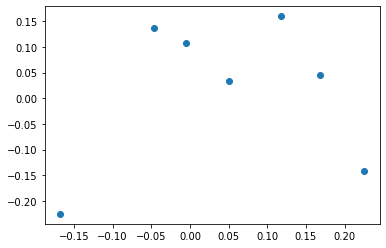

In [10]:
from matplotlib import pyplot as plt
plt.scatter(X[:,0], X[:,1])

In [13]:
model.most_similar('hello')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('you', 0.963416576385498),
 ('say', 0.5754939317703247),
 ('goodbye', 0.2557417154312134),
 ('and', -0.057760149240493774),
 ('.', -0.5699885487556458),
 ('i', -0.7739380598068237)]

In [14]:
import pandas
movies = pandas.read_excel('https://raw.githubusercontent.com/ywchiu/taipeifubon/master/data/yahoo_movie.xlsx', index_col = 0)

In [16]:
import jieba
#jieba.load_userdict('userdict.txt')
corpus = []

for idx, rec in movies[movies['status'].isin(['good', 'bad'])].iterrows():
    corpus.append(' '.join(jieba.cut(rec['content'])))

In [17]:
corpus = [e.split() for e in corpus]

In [18]:
from gensim.models import word2vec

num_features = 10 # 詞向量的維度
min_word_count = 10 # 最少要出現幾個詞才被拿來計算
num_workers = 4 # 使用多少個core
context = 10 # 上下文的詞區間
epoch = 20 # 訓練多少迭代 
sample = 1e-5 # 每次要取多少反面的例子校正訓練結果

model = word2vec.Word2Vec(corpus, workers = num_workers,sample = sample,
        size = num_features,min_count=min_word_count,
        window = context,iter = epoch)

In [19]:
model.wv.get_vector('動作片')

array([-0.05482616,  0.00175056,  0.04889046,  0.06502941,  0.01976057,
        0.14676803,  0.25496837,  0.06599604,  0.04702412, -0.00516513],
      dtype=float32)

In [20]:
model.most_similar('動作片')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('一顆', 0.9803900718688965),
 ('雷神', 0.9763356447219849),
 ('才', 0.9726817607879639),
 ('節奏', 0.9722476005554199),
 ('光劍', 0.9718320369720459),
 ('爆', 0.9705737829208374),
 ('場面', 0.9700506925582886),
 ('找', 0.9691914319992065),
 ('（', 0.9659179449081421),
 ('這集', 0.9656724333763123)]